<b>Machine Learning Exercise session: 9 September 2025</b>

# <b>Working with: Bias-Variance tradeoff</b>

Welcome to this week's exercise session. Today, we will learn about _LINEAR REGRESSION_. This notebook will take you through 
- Bias and Variance tradeoff
- Test and Train datasets

The exercises are structured in 3 sections. 

Remember 
- It is good practice to use the Machine Learning python environment you made in week 1. *Ensure that you are working within the virtual environment (venv) with **conda activate ml**. where **ml** is the name of the venv, and/or selecting it on VSCode/Jupyter*
- Solving these exercises is supposed to take much longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, and read the documentation if needed. <b>We are happy to help if you are stuck.</b>
- **None of the exercises are mandatory, do your best to solve them! Every weekend solutions will be published!**
- *Remember to provide a Feedback on this Exercise sheet on the LearnIT page of the course so we can make an even better exercise session!*

Have fun! 

# <b>Exploring theoretical background</b>

# Exercise t0
***Disclaimer :** This exercise is made for you to get an intuition on bias and variance. In doing so, you are free to sketch on paper or to code your solution.*

- Derive the bias-variance decomposition of the Mean Squared Error (MSE).

  1. Starting from the definition $MSE = \mathbb{E}[(y - \hat{f}(x))^2]$
  2. Derive the final form $MSE = \underbrace{(f(x) - \mathbb{E}[\hat{f}(x)])^2}_{\text{Bias}^2} + \underbrace{\mathbb{E}[(\mathbb{E}[\hat{f}(x) - \hat{f}(x)])^2]}_{\text{Variance}} + \underbrace{\sigma^2}_{\text{Irreducible Error}}
$

- What is the meaning of each term?

- Explain how high bias and high variance affect model performance.

- Think about what learning method can produce different combinations of low/high bias and low/high variance. Which would you choose in what context? Why?

(*Hint: Read the Bias-Variance tradeoff Wikipedia page for any detail : https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff*)


In [ ]:
# Solutions if needed
#Bias is the reference to the error introduced by approximating a real life problem. Its the squared product of the difference between the real value
#and the expected predicted value. If the bias is high, it can mean the model is too simple to capture the true patterns in the data.
#Meaning the models predictions are far from the true function
#Variance is the models sensitive to data, it captures how instable the mode is, how much predictions wiggle because of randomness.
#Meaning high variance, the model is very sensitive to data, where predictiosn change alot for each data set. Where as low variance
#the model is less sensitive to data. High variance = overfitting, modelling random noise.

# Exercise t1


Why is it important to split data into training and test sets? What problems arise if we evaluate on the training set only? What is the importance of splitting into train,validation, and test? Why can use the 60-20-20 rule of thumb?

In [2]:
# Solutions if needed

# Exercise t2

 ## Part 1 
1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
- (a) The sample size n is extremely large, and the number of predictors p is small.
- (b) The number of predictors p is extremely large, and the number of observations n is small.
- (c) The relationship between the predictors and response is highly non-linear.
- (d) The variance of the error terms, i.e. $\sigma^2 = Var(\varepsilon)$, is extremely high.


(*"flexible models can fit many different possible functional forms for f."-ISLwP pp.21*)

In [80]:
# Solutio
""" 
a) With large number of observations, and low amount of predictors, would result in low variance, as there is a limit on its capacity.
BUT it may lead to high bias, as the model may not have the power to express itself with low amount of predictors.
b) there will be high variance, with low amount of observations, but large amount of predictors. The bias will probably be low
because the model would be able to express its relationships.
c) for non linear relationships and we use linear models, this will result in high bias, but rather low variance. But we want to reduce the bias,
and to do that we introduce non-linear models, but this will increase the variance. If linear model = underfitting, we try
to fit the data too much and get too high variance it will result in overfitting.
d) If the error term’s variance is extremely high, the residuals will be very spread out. This reflects a large irreducible error in the data. No model, regardless of complexity, can reduce this error.



"""

## Part 2
 2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n (number of data) and p (parameters).
- (a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.
- (b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.
- (c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.


In [78]:
# Solution
""" 
a) we are most interested in the inference, because we are interested in the relationship. n = 500, p=4

b) we want to predict whether the product will be good or not. n = 20, p = 14

c) we want to predict the % change in the USD/Euro exchange rate. This might be both a prediction and inference, as we are both interested in
predicing the change, but also the relationship between the stock markets and the exchange rate. n = 52, p=4
"""

## Part 3
 3. We now revisit the bias-variance decomposition.
- (a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.
- (b) Explain why each of the five curves has the shape displayed in part (a)

Useful libraries:
- numpy: https://numpy.org/doc/stable/index
  - np.linspace : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
  - np.exp : https://numpy.org/doc/stable/reference/generated/numpy.exp.html
- matplotlib.pyplot: https://matplotlib.org/stable/tutorials/pyplot.html
  - plt.plot : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

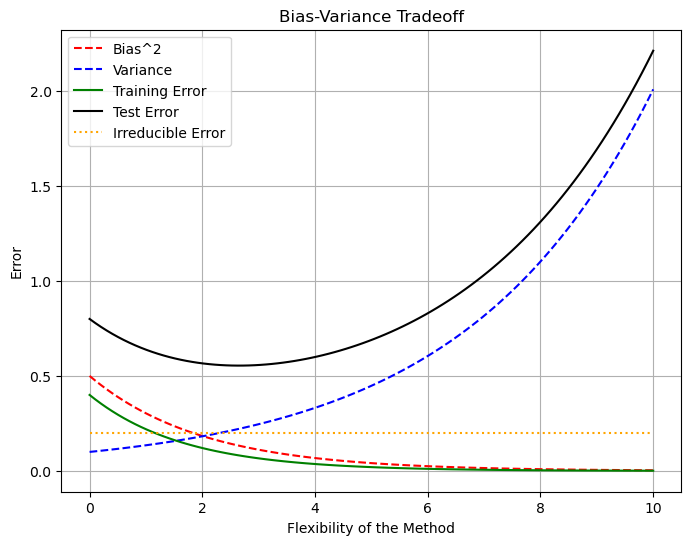

In [2]:
# Solution:
## Hint: exponentials are a good way to sketch each function. Play around with the parameters and plot them!

import numpy as np
import matplotlib.pyplot as plt

# Create a range of model flexibility values
flexibility = np.linspace(0, 10, 100)

# Define the curves
bias_squared = np.exp(-0.5 * flexibility) * 0.5
variance = np.exp(0.3 * flexibility) * 0.1
training_error = np.exp(-0.6 * flexibility) * 0.4
test_error = bias_squared + variance + 0.2  # includes irreducible error
irreducible_error = np.full_like(flexibility, 0.2)

plt.figure(figsize=(8, 6))
plt.plot(flexibility, bias_squared, label="Bias^2", color="red", linestyle="--")
plt.plot(flexibility, variance, label="Variance", color="blue", linestyle="--")
plt.plot(flexibility, training_error, label="Training Error", color="green")
plt.plot(flexibility, test_error, label="Test Error", color="black")
plt.plot(flexibility, irreducible_error, label="Irreducible Error", color="orange", linestyle=":")

# Labels and title
plt.xlabel("Flexibility of the Method")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

# <b>Applying what you learned</b>

### Documentation

LIBRARIES AND METHODS EXPECTED TO BE USED:
- numpy : https://numpy.org/doc/stable/index
- pandas : https://pandas.pydata.org/pandas-docs/stable/
- matplotlib.pyplot : https://matplotlib.org/stable/tutorials/pyplot.html
- scipy.stats : https://docs.scipy.org/doc/scipy/tutorial/stats.html
- sklearn : https://sklearn.org/stable/getting_started.html
  - datasets : https://scikit-learn.org/stable/api/sklearn.datasets.html
  - linear_model : https://sklearn.org/stable/api/sklearn.linear_model.html
  - model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html
  - metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html

# Exercise a1

***Disclaimer:** As stated above, it's not expected to fully finish this exercise. There are multiple ways of approaching it. It is highly encouraged to go through the main points, reflecting on the meaning of bias-variance tradeoff.*

Following on from the diabetes exercises of the last two weeks (*Ex.5 week 1, Ex.a1 week 2*):

1. Import the diabetes dataset from sklearn
   - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names

2. Using a Forward Selection approach, build a Linear Regression. Every new variable (feature) will increase the level of complexity of the model.
   - LinearRegression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
3. Evaluate Bias, Variance, and MSE for each new model (Every time you are adding a feature you are testing a "new" model)
4. Plot the Bias, Variance, and MSE.

Features: ['age'], Bias^2: 5942.08, Variance: 207.02, MSE: 6149.10
Features: ['age', 'sex'], Bias^2: 5614.73, Variance: 211.28, MSE: 5826.01
Features: ['age', 'sex', 'bmi'], Bias^2: 7684.51, Variance: 2076.42, MSE: 9760.93
Features: ['age', 'sex', 'bmi', 'bp'], Bias^2: 6477.62, Variance: 2319.62, MSE: 8797.23
Features: ['age', 'sex', 'bmi', 'bp', 's1'], Bias^2: 5511.38, Variance: 2432.02, MSE: 7943.40
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2'], Bias^2: 5611.88, Variance: 2415.08, MSE: 8026.96
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3'], Bias^2: 5068.80, Variance: 3026.33, MSE: 8095.13
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4'], Bias^2: 5285.42, Variance: 2911.16, MSE: 8196.59
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'], Bias^2: 5948.43, Variance: 3113.39, MSE: 9061.82
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], Bias^2: 6581.60, Variance: 3098.32, MSE: 9679.92


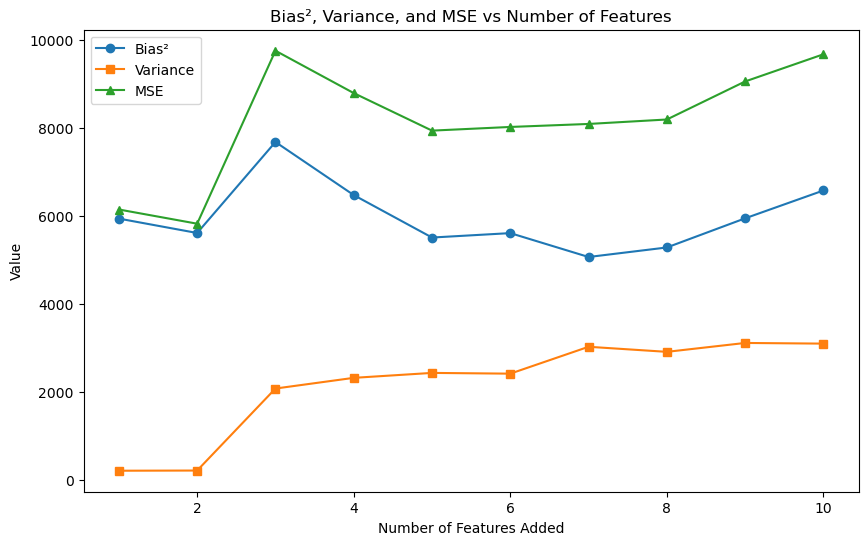

In [16]:
# Solution
selected_features = []
results = []

for feature in feature_names:
    selected_features.append(feature)
    indices = [feature_names.index(f) for f in selected_features]
    X_subset = X[:,indices]
    n_set = 100
    test_pred = []
    for i in range(100):
        X_train, X_test, y_train, y_test =  train_test_split(X_subset,y,test_size=0.2)
        model = LinearRegression()
        model.fit(X_train, y_train)
        test_pred.append(model.predict(X_test))
    test_preds = np.array(test_pred).T  # transpose so rows = samples, cols = iterations
    y_test_all = np.tile(y_test, (100, 1)).T
    # Compute Bias^2, Variance, MSE
    test_pred_mean = np.mean(test_preds, axis=1)
    bias_squared = np.mean((test_pred_mean - y_test) ** 2)
    variance = np.mean(np.var(test_preds, axis=1))
    mse = np.mean((test_preds - y_test_all) ** 2)

    results.append({
        'features': selected_features.copy(),
        'bias^2': bias_squared,
        'variance': variance,
        'MSE': mse
    })

for r in results:
    print(f"Features: {r['features']}, Bias^2: {r['bias^2']:.2f}, Variance: {r['variance']:.2f}, MSE: {r['MSE']:.2f}")
feature_counts = [len(r['features']) for r in results]
bias2 = [r['bias^2'] for r in results]
variance = [r['variance'] for r in results]
mse = [r['MSE'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(feature_counts, bias2, marker='o', label='Bias²')
plt.plot(feature_counts, variance, marker='s', label='Variance')
plt.plot(feature_counts, mse, marker='^', label='MSE')
plt.xlabel("Number of Features Added")
plt.ylabel("Value")
plt.title("Bias², Variance, and MSE vs Number of Features")
plt.legend()
plt.show()

# <b>Exploring what you learned</b>

# Exercise e1

**Estimating $\pi$**

To have a better understanding of how bias and variance are affecting regression:

1. Generate n points (e.g. n=10000) using a normal distribution in every of the four possible scenarios (Low/High bias, Low/high variance):

    - np.random.normal(loc=BIAS, scale=VARIANCE, size=n_points)
    - https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
2. Plot the results

In [85]:
# Solution: 
# import numpy as np
# import matplotlib.pyplot as plt

# n = 10000
# Low bias = 0
# High bias = 0.5
# Low variance = 0.5
# High variance = 1.0

3. A good way to estimate $\pi$ is by computing the ratio of points that fall in the unit circle (radius=1) and multiply by 4. Why is that?
4. np.pi is the "real" value of $\pi$. Use it to compute the error om the estimate.

In [ ]:
# Solution

4. Now you should have four estimates of $\pi$. Plot them with their relative errorbars.
5. You can do a linear regression on them. What is its $R^2$? What does it says about the quality of the fit?

In [ ]:
# Solution

# Exercise e2


After spending too much time on studying linear regression, you come across a interesting-looking dataset: neptune_forest_cover.csv.
Excited by the prospect of making a new discovery using the tools just learned, you decide to perform a regression analysis on it.

1. Inspect the data (plot)
2. Use sklearn.linear_model.LinearRegression to fit the data and print the coefficients (slope, intercept, $R^2$)

In [ ]:
# Solution: 
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file
# df = pd.read_csv("neptune_forest_cover.csv")


Realizing how good the fit is, you decide to put it to the test by reproducing some plots from the slides on Bias-Variance.
It might be a REAL law of nature after all, like how height affects foot size.

3. Fix one point $d_0$ in the middle of the x-range, and generate n points (e.g. n= 100) in the y-range of the plot.
4. For each point, calculate the MSE. Plot the results on a histogram
   - x-axis : number of trials (realizations), y-axis : MSE
5. Do it with the other two points $d_1$ and $d_2$, one on the lower bound of the x-axis, and one on the upper one. What are you noticing in the magnitude of the MSE? Why is that?

In [ ]:
# Solution 
